<a href="https://colab.research.google.com/github/EduardoVieira357/DIO_AULA_PANDAS/blob/main/DIO_Edu_Analise_Exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AULA8 ANÁLISE EXPLORATÓRIA DE DADOS**

In [ ]:
# IMPORTANDO AS BIBLIOTECAS

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

print('BIBLIOTECAS importadas!')

BIBLIOTECAS importadas!


In [ ]:
#upload arquivo    #### outra maneira de subir arquivos para o google... ficará no temporário!

from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [ ]:
# lendo o arquivo e criando o dataframe

df = pd.read_excel('AdventureWorks.xlsx')
df.head(3)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [ ]:
df.shape # linhas e colunas

(904, 16)

In [ ]:
df.dtypes # tipos de dados

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [ ]:
# qual a receita total?

df['Valor Venda'].sum()

5984606.1426

In [ ]:
# criar a coluna custo

df['Custo'] = df['Custo Unitário'] * df['Quantidade'] # criando a coluna custo

In [ ]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [ ]:
# qual o custo total

round(df['Custo'].sum(),2)

2486783.05

In [ ]:
## Qual o lucro total... lucro = Valor Venda - custo

df['Lucro'] = df['Valor Venda'] - df['Custo']

In [ ]:
df[['Data Venda','ID Loja','ID Produto', 'Valor Venda', 'Custo', 'Lucro']].head(3)

,Data Venda,ID Loja,ID Produto,Valor Venda,Custo,Lucro
0,2008-05-09,199,384,4548.0,2091.48,2456.52
1,2008-05-12,306,384,4548.0,2091.48,2456.52
2,2008-05-14,306,384,4548.0,2091.48,2456.52


In [ ]:
# total lucro
round(df['Lucro'].sum(),2)

3497823.09

In [ ]:
# criando uma coluna com o total de dias para enviar o produto

df['Tempo_envio'] = df['Data Envio'] - df['Data Venda']

In [ ]:
df[['Data Venda','Data Envio', 'Tempo_envio','ID Loja','ID Produto', 'Valor Venda', 'Custo', 'Lucro']].head(5)

,Data Venda,Data Envio,Tempo_envio,ID Loja,ID Produto,Valor Venda,Custo,Lucro
0,2008-05-09,2008-05-29,20 days,199,384,4548.0,2091.48,2456.52
1,2008-05-12,2008-05-17,5 days,306,384,4548.0,2091.48,2456.52
2,2008-05-14,2008-05-20,6 days,306,384,4548.0,2091.48,2456.52
3,2008-05-21,2008-05-27,6 days,306,384,4548.0,2091.48,2456.52
4,2008-06-20,2008-06-27,7 days,306,384,4548.0,2091.48,2456.52


In [ ]:
df.dtypes  ### veja como ficou o Tempo_envio... X days!  e agora?

Data Venda         datetime64[ns]
Data Envio         datetime64[ns]
ID Loja                     int64
ID Produto                  int64
ID Cliente                  int64
No. Venda                  object
Custo Unitário            float64
Preço Unitário            float64
Quantidade                  int64
Valor Desconto            float64
Valor Venda               float64
Produto                    object
Fabricante                 object
Marca                      object
Classe                     object
Cor                        object
Custo                     float64
Lucro                     float64
Tempo_envio       timedelta64[ns]
dtype: object

In [ ]:
df['Tempo_envio'].head(2) ### verificando

0   20 days
1    5 days
Name: Tempo_envio, dtype: timedelta64[ns]

In [ ]:
df['Tempo_envio'].dt.days.head(2)  ### edu convertendo

0    20
1     5
Name: Tempo_envio, dtype: int64

In [ ]:
### professora convertendo, antes da criação da coluna TEMPO_ENVIO

df['Tempo_envio'] = (df['Data Envio'] - df['Data Venda']).dt.days
df[['Data Venda','Data Envio', 'Tempo_envio','ID Loja','ID Produto', 'Valor Venda', 'Custo', 'Lucro']].head(4)

,Data Venda,Data Envio,Tempo_envio,ID Loja,ID Produto,Valor Venda,Custo,Lucro
0,2008-05-09,2008-05-29,20,199,384,4548.0,2091.48,2456.52
1,2008-05-12,2008-05-17,5,306,384,4548.0,2091.48,2456.52
2,2008-05-14,2008-05-20,6,306,384,4548.0,2091.48,2456.52
3,2008-05-21,2008-05-27,6,306,384,4548.0,2091.48,2456.52


In [ ]:
df['Tempo_envio'].dtype

dtype('int64')

In [ ]:
# media do tempo de envio por marca

df.groupby('Marca')['Tempo_envio'].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo_envio, dtype: float64

MISSING VALUES

In [ ]:
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo_envio       0
dtype: int64

In [ ]:
df.columns

Index(['Data Venda', 'Data Envio', 'ID Loja', 'ID Produto', 'ID Cliente',
       'No. Venda', 'Custo Unitário', 'Preço Unitário', 'Quantidade',
       'Valor Desconto', 'Valor Venda', 'Produto', 'Fabricante', 'Marca',
       'Classe', 'Cor', 'Custo', 'Lucro', 'Tempo_envio'],
      dtype='object')

In [ ]:
# LUCRO POR ANO E POR MARCA?
# agrupar por ano e marca

print(df.groupby([df['Data Venda'].dt.year, df['Marca']])['Lucro'].sum()) ### dentro de colchetes

# ou
print('==============================================================')

print(df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum()) # ele entende que é o mesmo df...

Data Venda  Marca          
2008        Adventure Works    3.066412e+05
            Contoso            5.641600e+04
            Fabrikam           1.557021e+06
2009        Adventure Works    4.053951e+05
            Contoso            1.382590e+05
            Fabrikam           1.034091e+06
Name: Lucro, dtype: float64
Data Venda  Marca          
2008        Adventure Works    3.066412e+05
            Contoso            5.641600e+04
            Fabrikam           1.557021e+06
2009        Adventure Works    4.053951e+05
            Contoso            1.382590e+05
            Fabrikam           1.034091e+06
Name: Lucro, dtype: float64


In [ ]:
### setando o pandas para não mostrar a notação cientifica

#pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.float_format = '{:20,.2f}'.format

In [ ]:
# LUCRO POR ANO E POR MARCA?


df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum() # ele entende que é o mesmo df...

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

In [ ]:
#Pegando as infos e criando a coluna

lucro_ano = df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum()
lucro_ano

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

In [ ]:
#Pegando as infos e criando a coluna e RESETANDO O INDEX... agora sim

lucro_ano = df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum().reset_index()
lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [ ]:
# qual o total de produtos vendidos?

df.groupby('Produto')['Quantidade'].sum()

Produto
Adventure Works Laptop15.4W M1548 Black             1089
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Name: Quantidade, dtype: int64

In [ ]:
# qual o total de produtos vendidos?

df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

In [ ]:
# qual o total de produtos vendidos?

df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=True)

Produto
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Black             1089
Headphone Adapter for Contoso Phone E130 White     25008
Headphone Adapter for Contoso Phone E130 Silver    25232
Name: Quantidade, dtype: int64

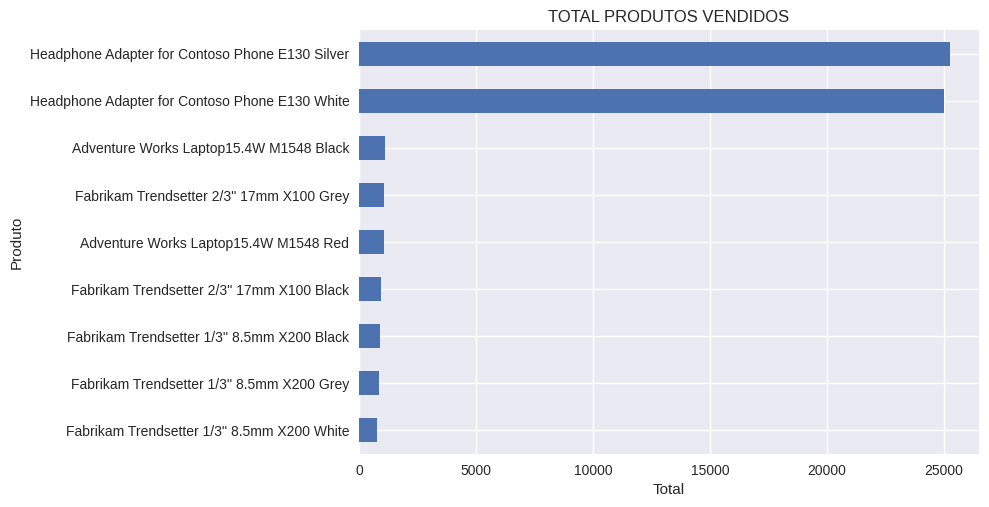

In [ ]:
# qual o total de produtos vendidos?

df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=True).plot.barh(title='TOTAL PRODUTOS VENDIDOS')

plt.xlabel('Total')
plt.ylabel('Produto');

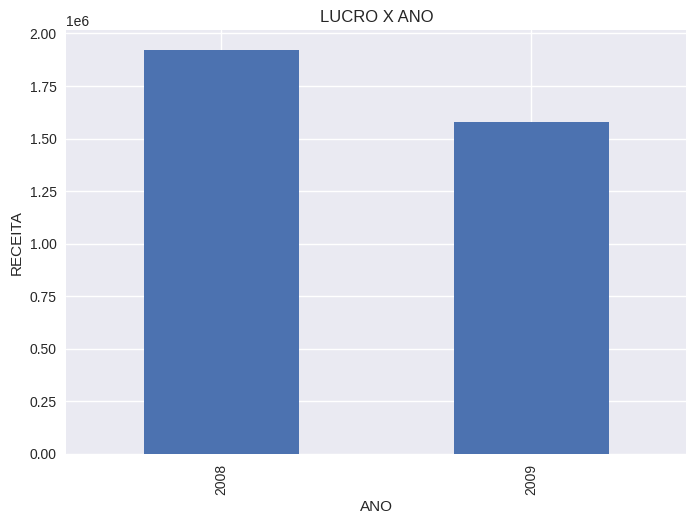

In [ ]:
# lucro por ano

df.groupby(df['Data Venda'].dt.year)['Lucro'].sum().plot.bar(title='LUCRO X ANO')

plt.xlabel('ANO')
plt.ylabel('RECEITA');

In [ ]:
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: Lucro, dtype: float64

In [ ]:
# ANALISANDO AS VENDAS DE 2009 ...

ano_2009 = df['Data Venda'].dt.year == 2009
df_2009 = df[ano_2009]
df_2009.head(2)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11


In [ ]:
# Após selecionar 2009, podemos agrupar por MES.

df_2009.groupby(df_2009['Data Venda'].dt.month)['Lucro'].sum()

Data Venda
1              130,719.04
2              179,228.92
3              147,538.25
4               66,354.39
5               90,540.00
6              200,310.41
7              227,134.51
8               46,756.42
9               83,952.62
10             130,678.05
11             132,202.23
12             142,330.53
Name: Lucro, dtype: float64

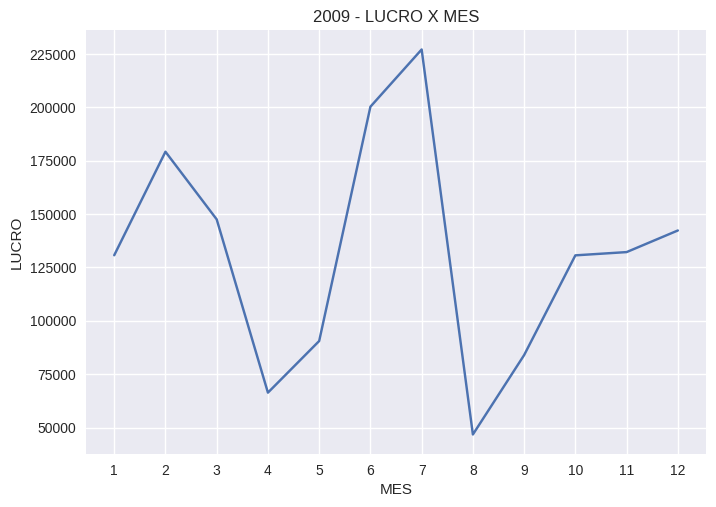

In [ ]:
# plotando o grafico, com a escala de meses correta!

#x=[1,2,3,4,5,6,7,8,9,10,11,12]  ### alternativa 1
x = [x for x in range(1,13)]  ### alternativa 2


df_2009.groupby(df_2009['Data Venda'].dt.month)['Lucro'].sum().plot(title='2009 - LUCRO X MES')

plt.xticks(x)
plt.xlabel('MES')
plt.ylabel('LUCRO');

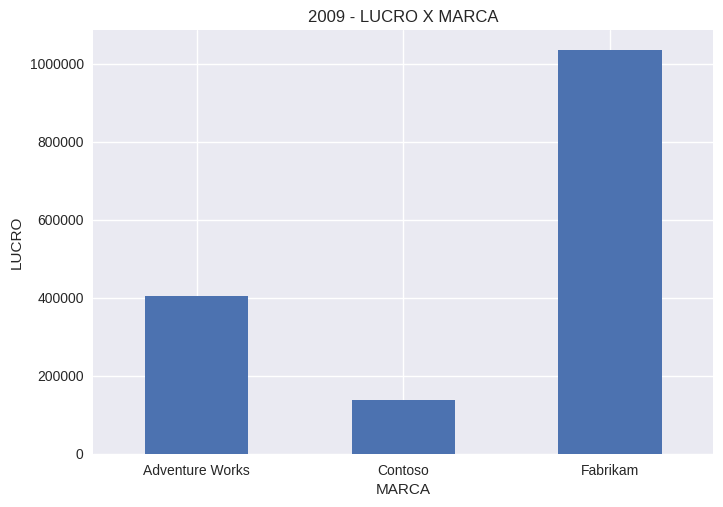

In [ ]:
### removendo a notação científica

plt.ticklabel_format(style='plain')  ### removendo a notação científica

df_2009.groupby(df_2009['Marca'])['Lucro'].sum().plot.bar(title='2009 - LUCRO X MARCA')

plt.xticks(rotation='horizontal') ### colocando o label na horizontal
plt.xlabel('MARCA')
plt.ylabel('LUCRO');

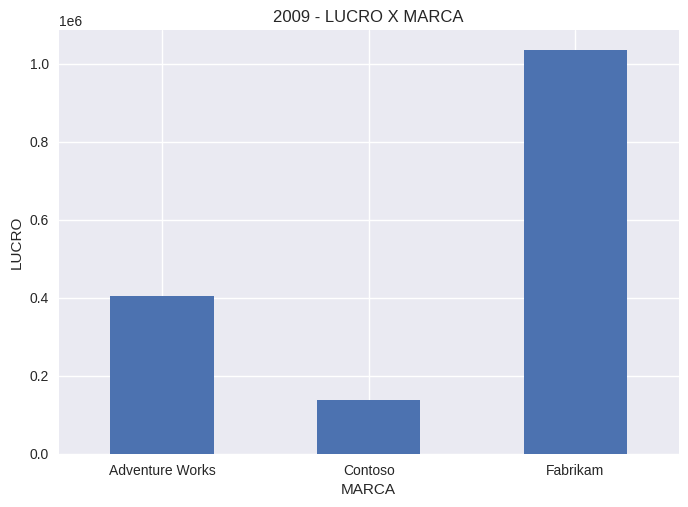

In [ ]:
### Veja a notação cientifica  1e6  no grafico

df_2009.groupby('Marca')['Lucro'].sum().plot.bar(title='2009 - LUCRO X MARCA') ### sem colchete

plt.xticks(rotation='horizontal') ### colocando o label na horizontal
plt.xlabel('MARCA')
plt.ylabel('LUCRO');

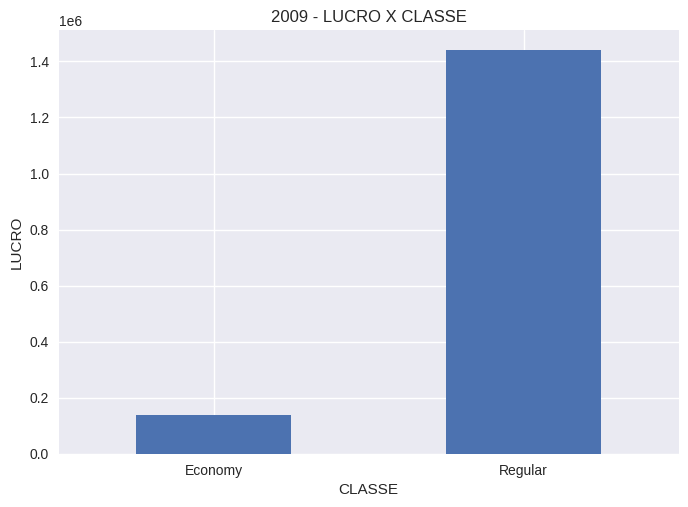

In [ ]:
df_2009.groupby(df_2009['Classe'])['Lucro'].sum().plot.bar(title='2009 - LUCRO X CLASSE')

plt.xticks(rotation='horizontal') ### colocando o label na horizontal
plt.xlabel('CLASSE')
plt.ylabel('LUCRO');

In [ ]:
df['Tempo_envio'].describe()


count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo_envio, dtype: float64

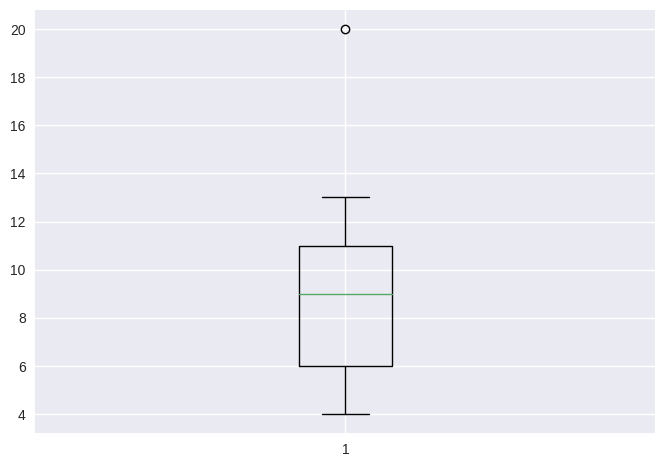

In [ ]:
# grafico boxplot
plt.boxplot(df['Tempo_envio']);

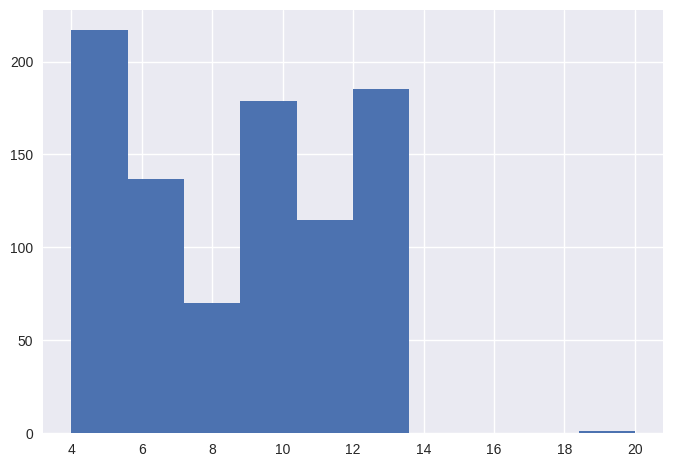

In [ ]:
# histograma by professora

plt.hist(df['Tempo_envio']);

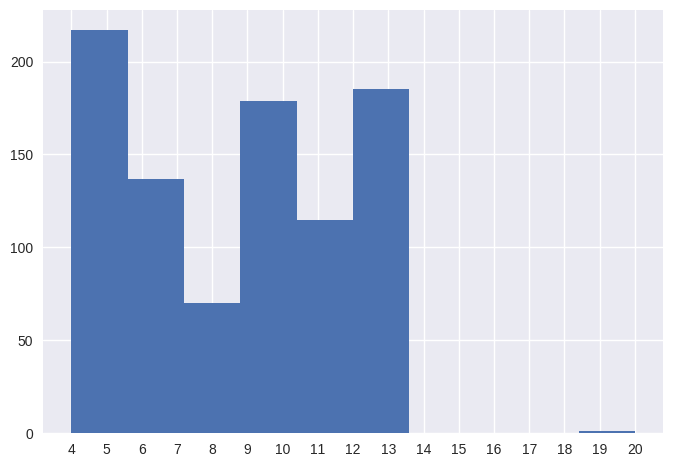

In [ ]:
### histograma com eixo x certinho

x = [x for x in range(1,21)]  ### range de 1 até 20
plt.xticks(x)
plt.hist(df['Tempo_envio']);

In [ ]:
print(df['Tempo_envio'].min())
print(df['Tempo_envio'].max())

4
20


In [ ]:
# identificando o outlier
df[df['Tempo_envio']==20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [ ]:
df.to_csv('df_vendas_novo.csv', index=False)